In [ ]:
import pandas as pd                            #### To read the data
import numpy as np                             ### To Perform some Numerical Calculations
import matplotlib.pyplot as plt                ### To Perform some visualizations for Understanding
import seaborn as sns                          ### To Perform some visualizations for calaculations
import scipy.stats as stats                    ### To check the calculations
import warnings
warnings.filterwarnings('ignore')              ### To remove Warnings

In [ ]:
df=pd.read_csv("churn.csv")                      #### Reading the Data

In [ ]:
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


### Exploratory Data Analysis

In [ ]:
## Changing the data type column
df['day.charge']=df['day.charge'].astype('float')
df['eve.mins']=df['eve.mins'].astype('float')

In [ ]:
### Dividing the target variable and features
features=df.drop(columns=['churn','Unnamed: 0','state'])
target=df['churn']

In [ ]:
features

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1
1,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1
2,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0
3,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2
4,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2
4996,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3
4997,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1
4998,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0


In [ ]:
features.info()                           #### Showing the Information about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area.code       5000 non-null   object 
 1   account.length  5000 non-null   int64  
 2   voice.plan      5000 non-null   object 
 3   voice.messages  5000 non-null   int64  
 4   intl.plan       5000 non-null   object 
 5   intl.mins       5000 non-null   float64
 6   intl.calls      5000 non-null   int64  
 7   intl.charge     5000 non-null   float64
 8   day.mins        5000 non-null   float64
 9   day.calls       5000 non-null   int64  
 10  day.charge      4993 non-null   float64
 11  eve.mins        4976 non-null   float64
 12  eve.calls       5000 non-null   int64  
 13  eve.charge      5000 non-null   float64
 14  night.mins      5000 non-null   float64
 15  night.calls     5000 non-null   int64  
 16  night.charge    5000 non-null   float64
 17  customer.calls  5000 non-null   i

In [ ]:
features.describe()       #### Showing the statistical measures for each numerical columns

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


### Visualizations For understanding the data

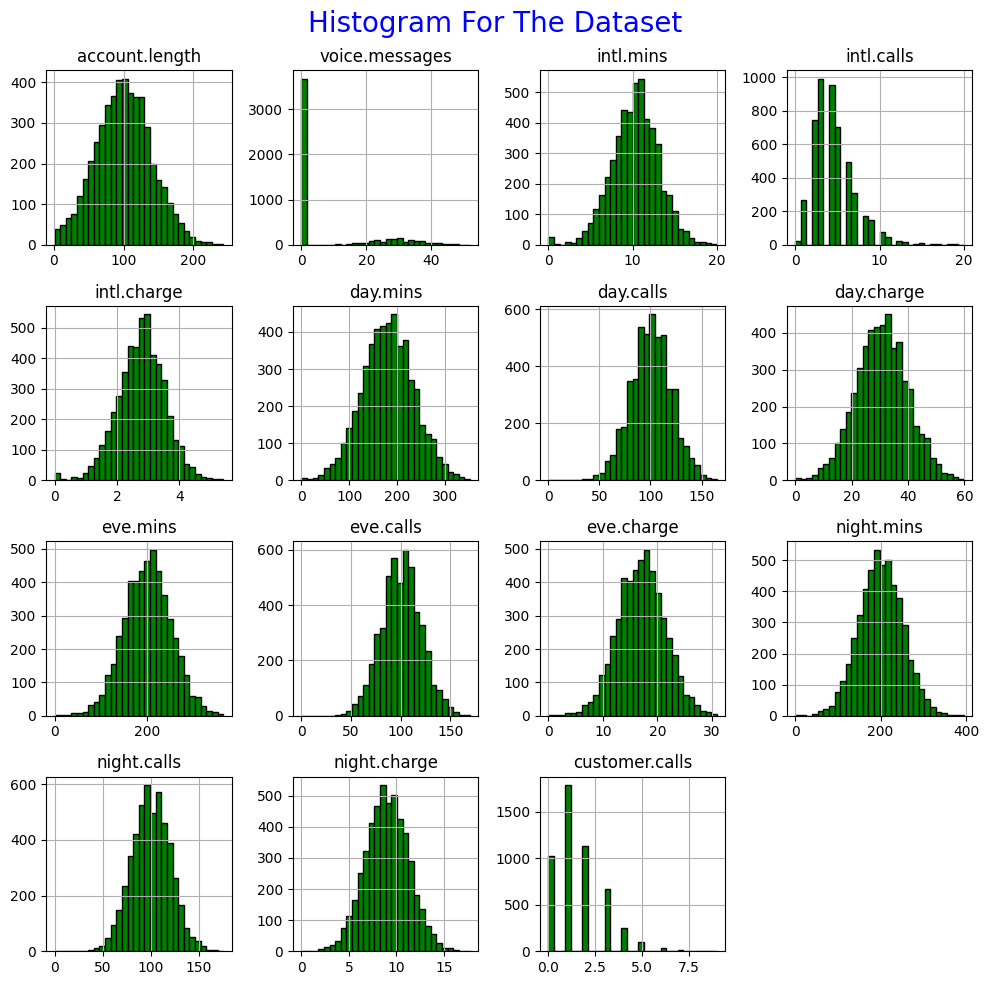

In [ ]:
### Histogram for the Dataset
### Only for Numerical Columns from the datset
features.hist(bins=30,figsize=(10,10),color='green',edgecolor='black')            ### Showing the Histogram
plt.suptitle('Histogram For The Dataset',fontsize=20,color='blue')                ### Showing the Title for the graph
plt.tight_layout()                                                                ### Removes unnecessary congestion
plt.show()

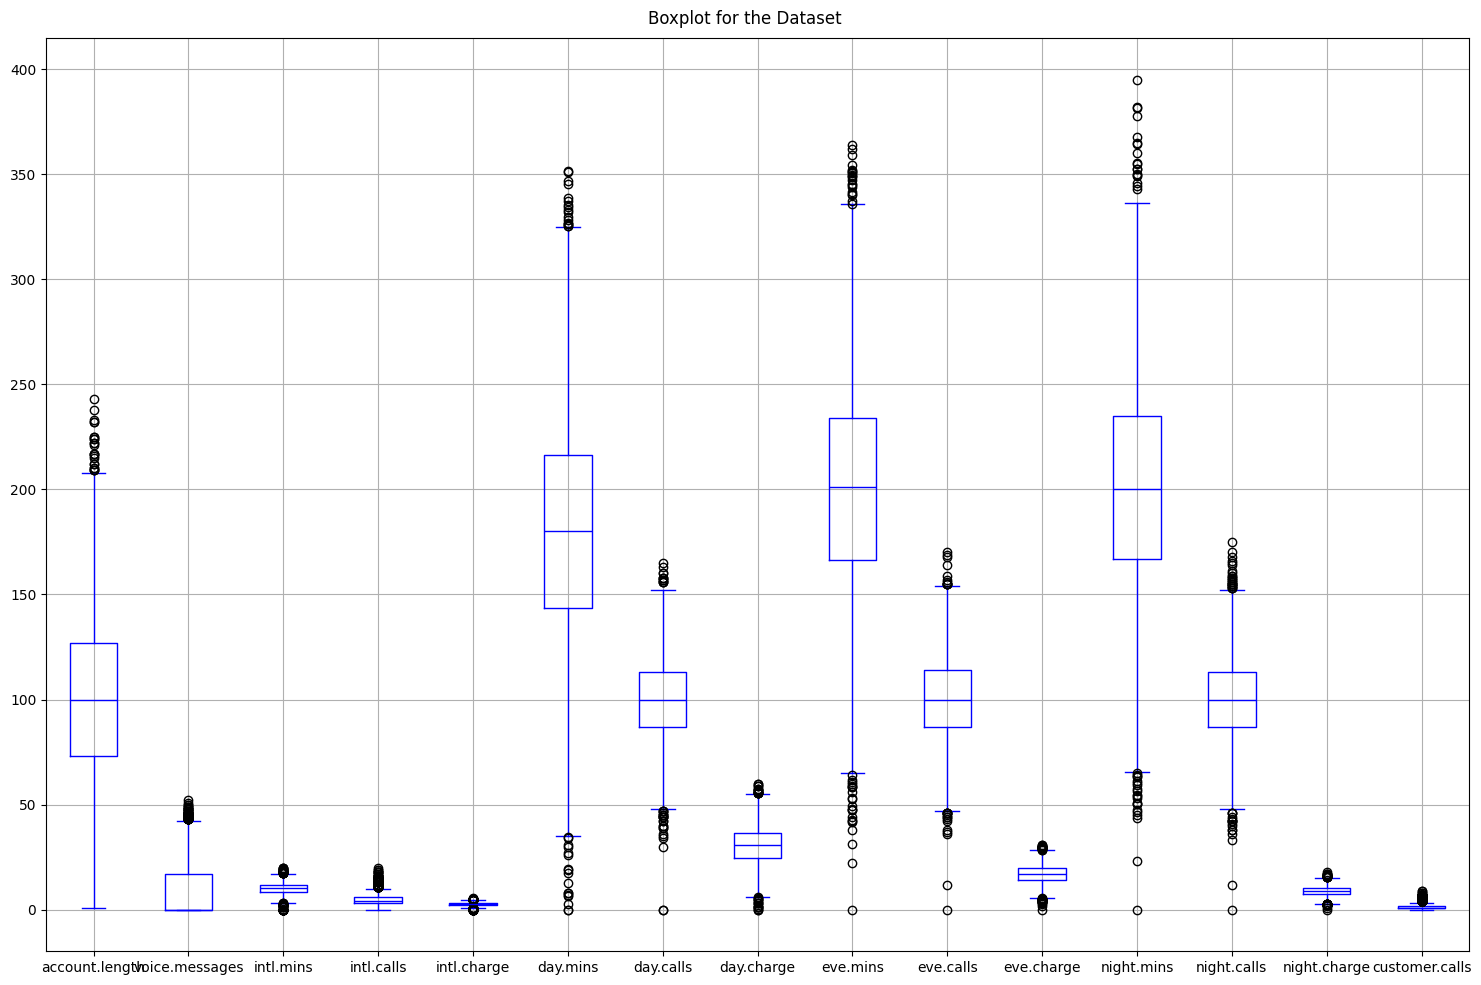

In [ ]:
#### Boxplot for the Dataset
### Showing the Outliers in the dataset , but only for numerical columns
features.boxplot(figsize=(15,10),color='blue')
plt.suptitle("Boxplot for the Dataset")
plt.tight_layout()
plt.show()

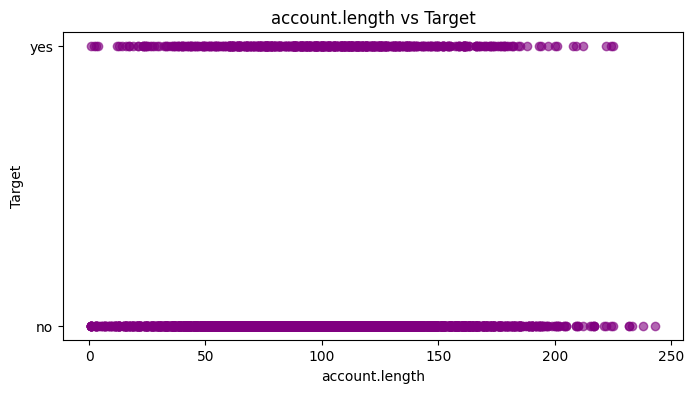

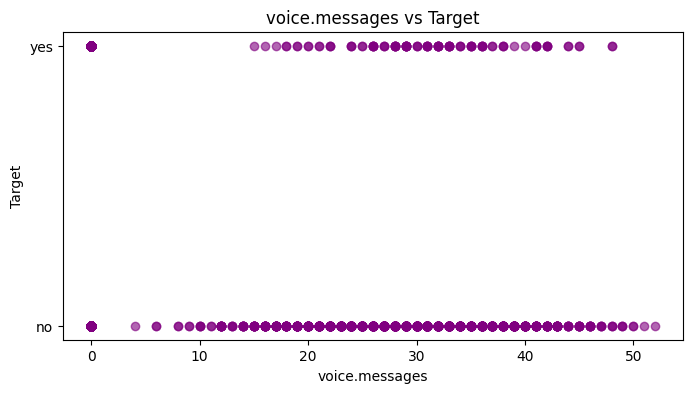

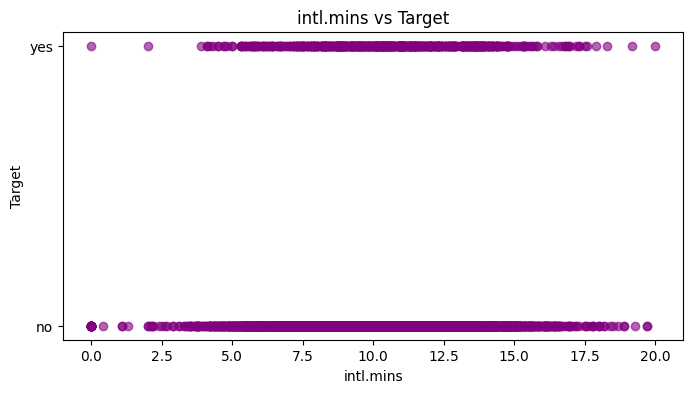

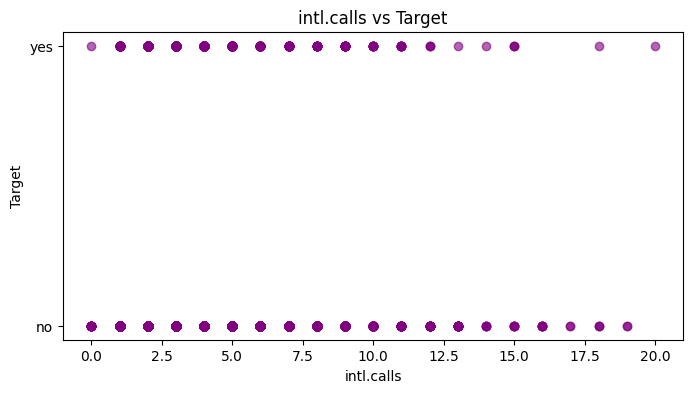

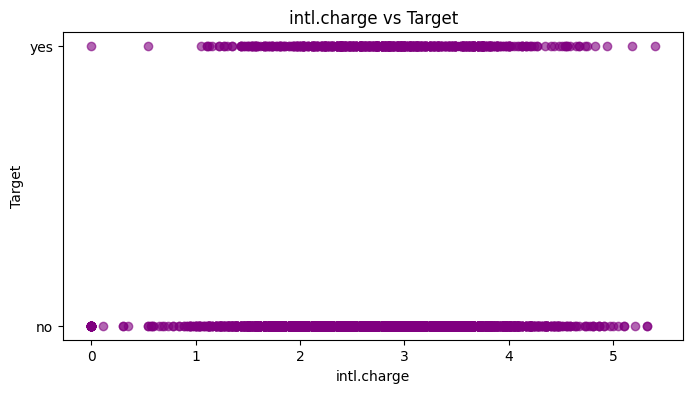

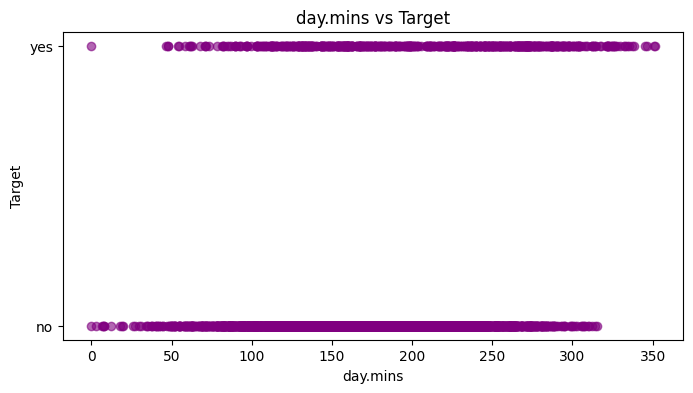

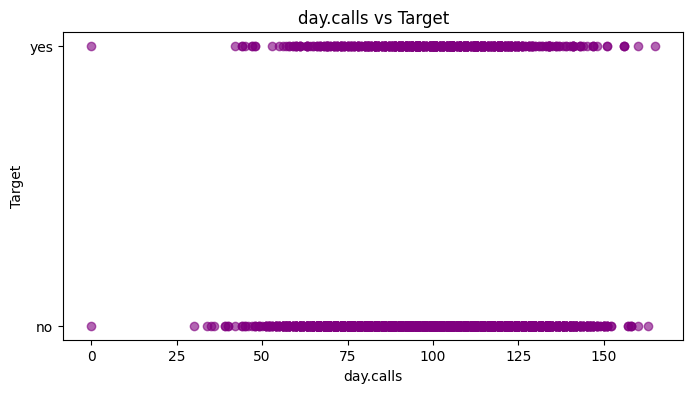

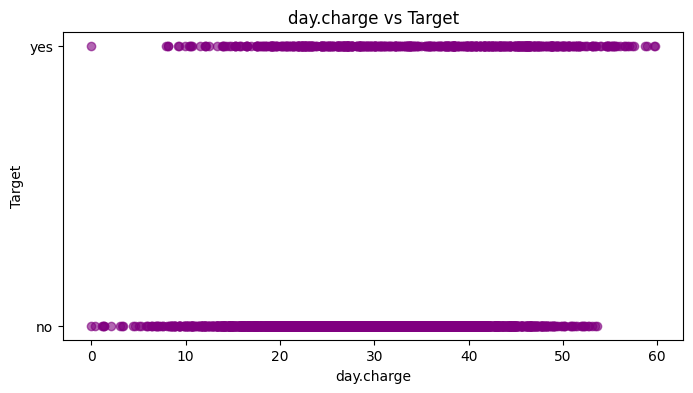

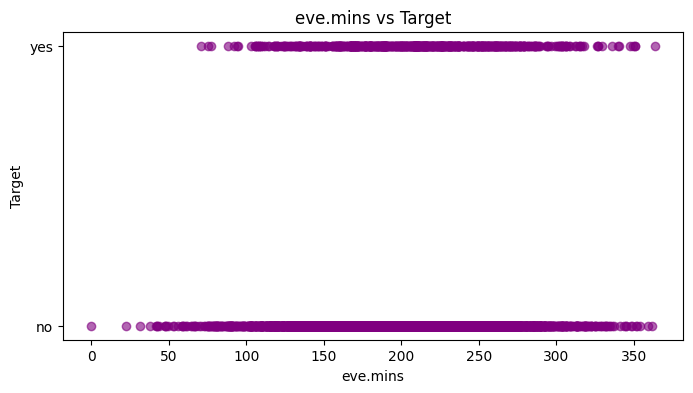

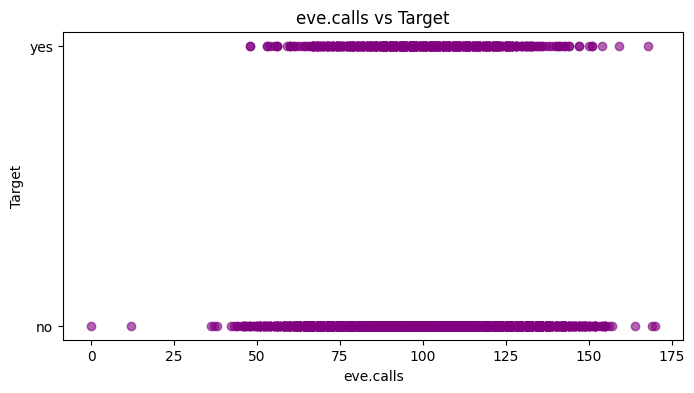

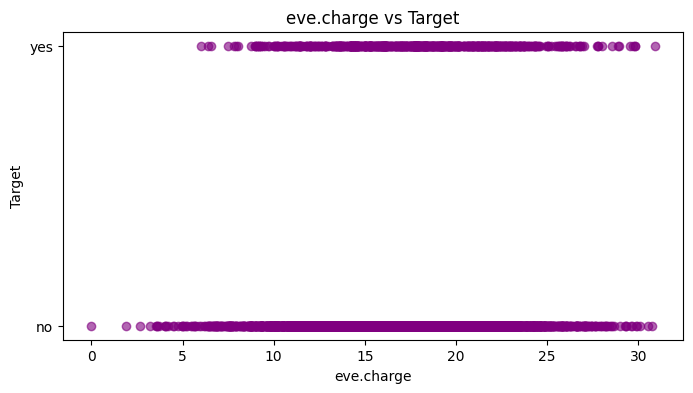

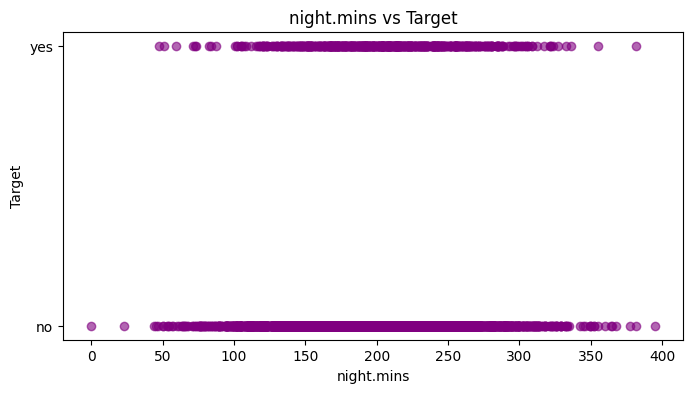

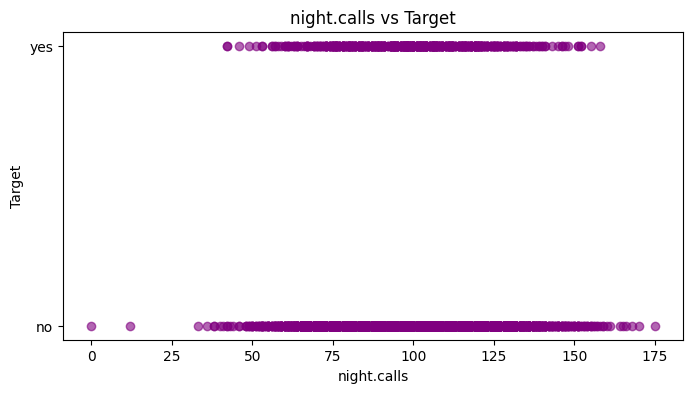

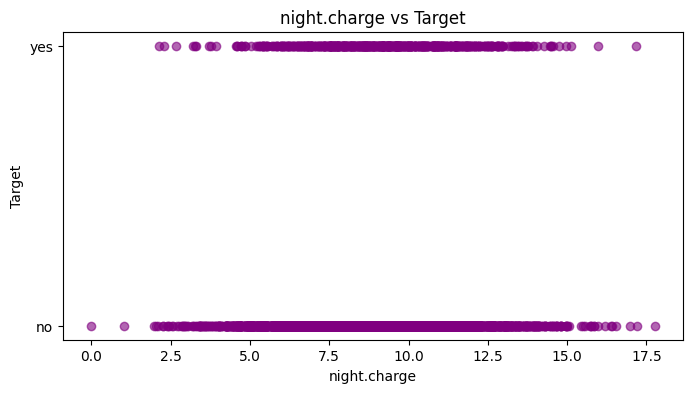

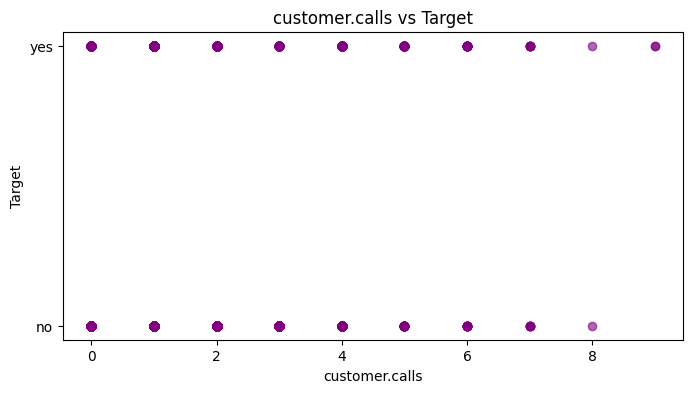

In [ ]:
### Scatter plot shows relationshops with target
for column in features.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(features[column], df['churn'], alpha=0.6, color='purple')
    plt.title(f"{column} vs Target")
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.show()

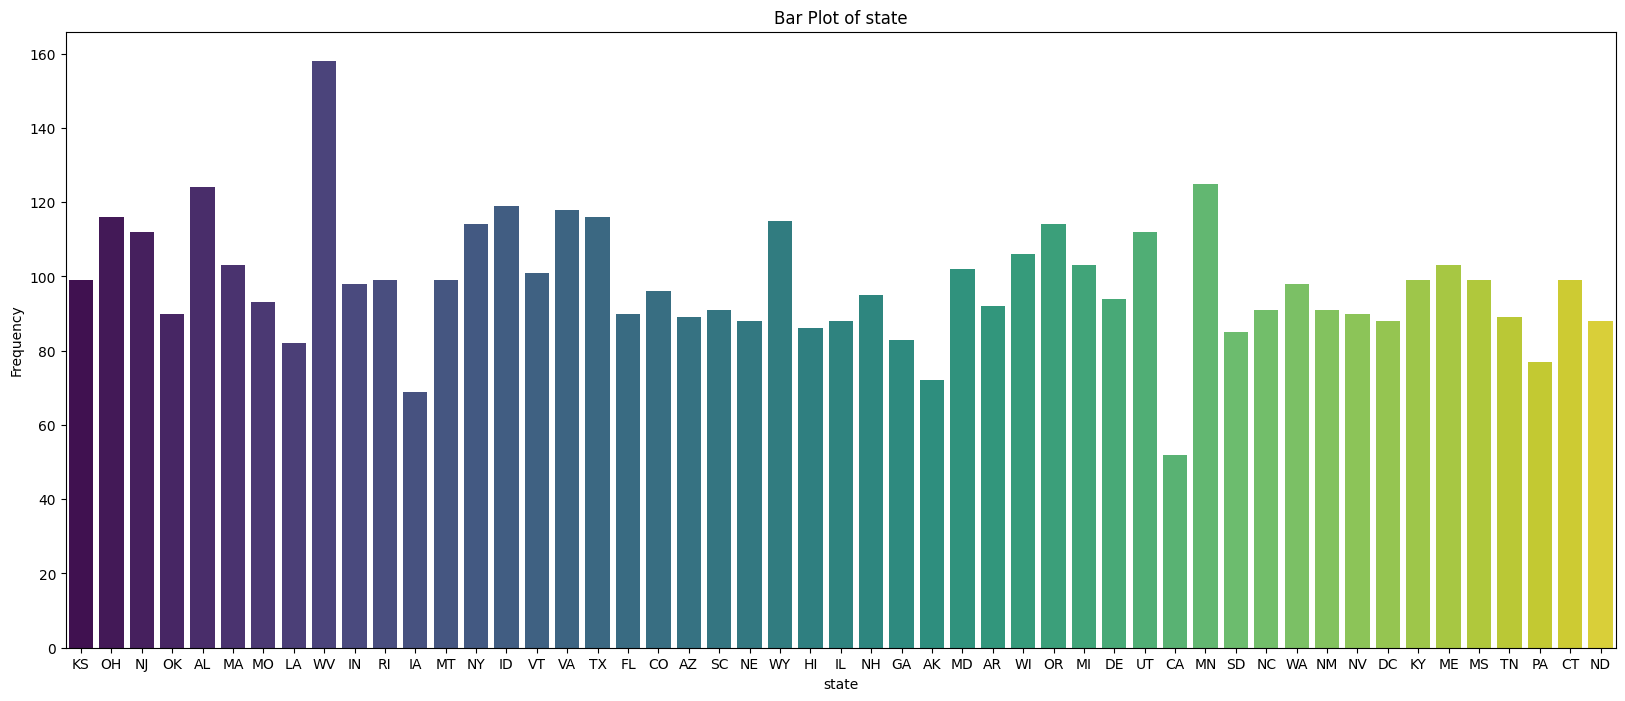

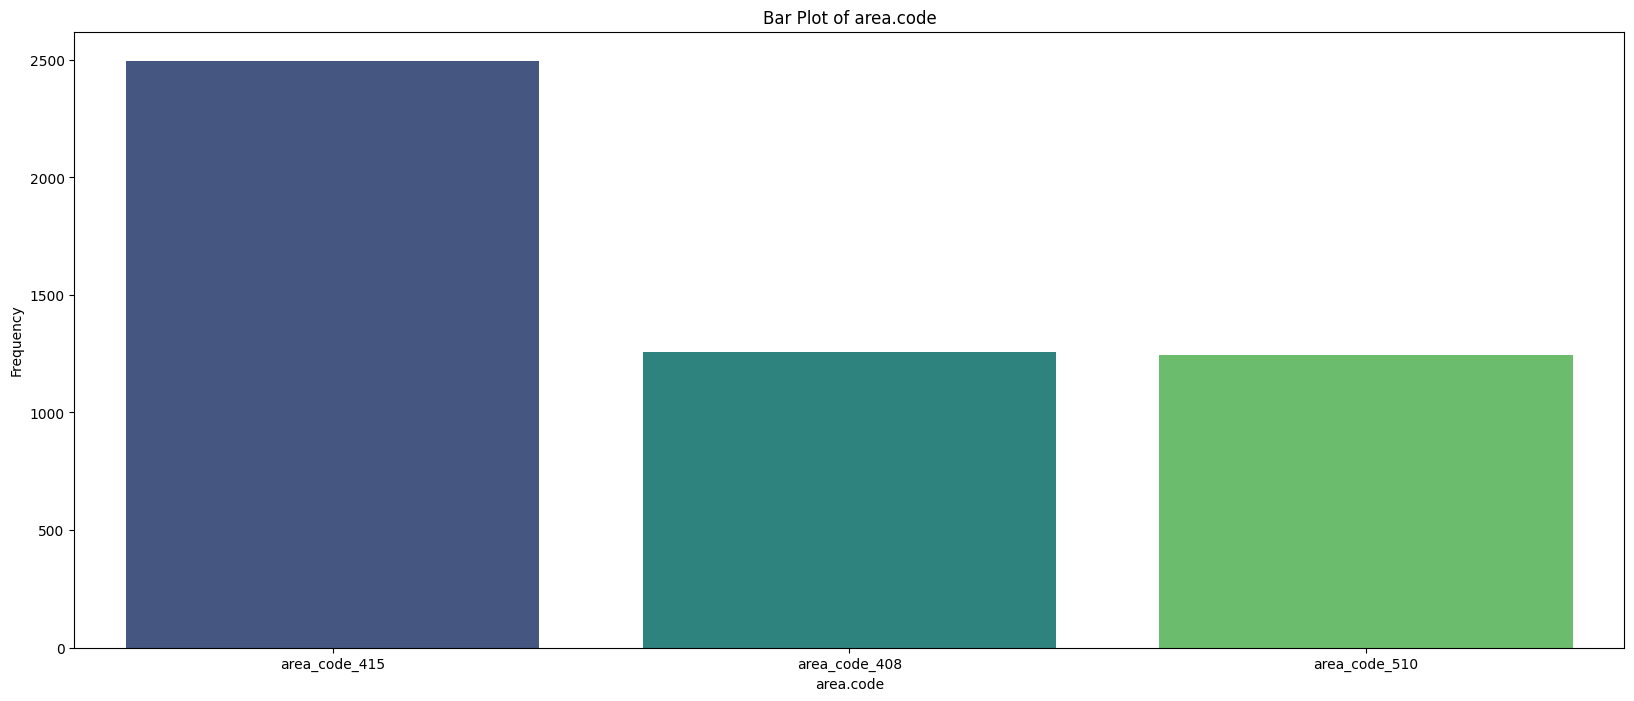

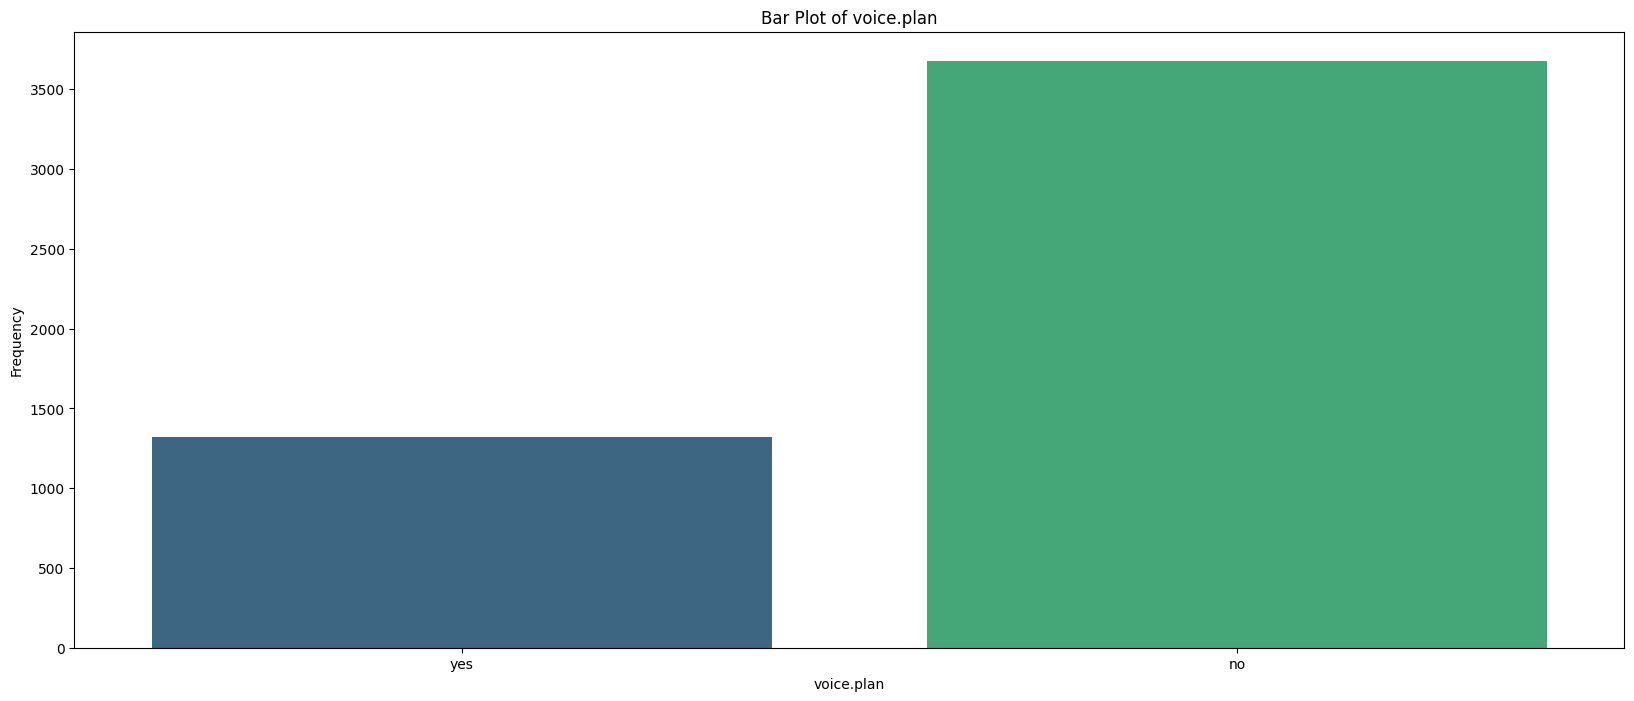

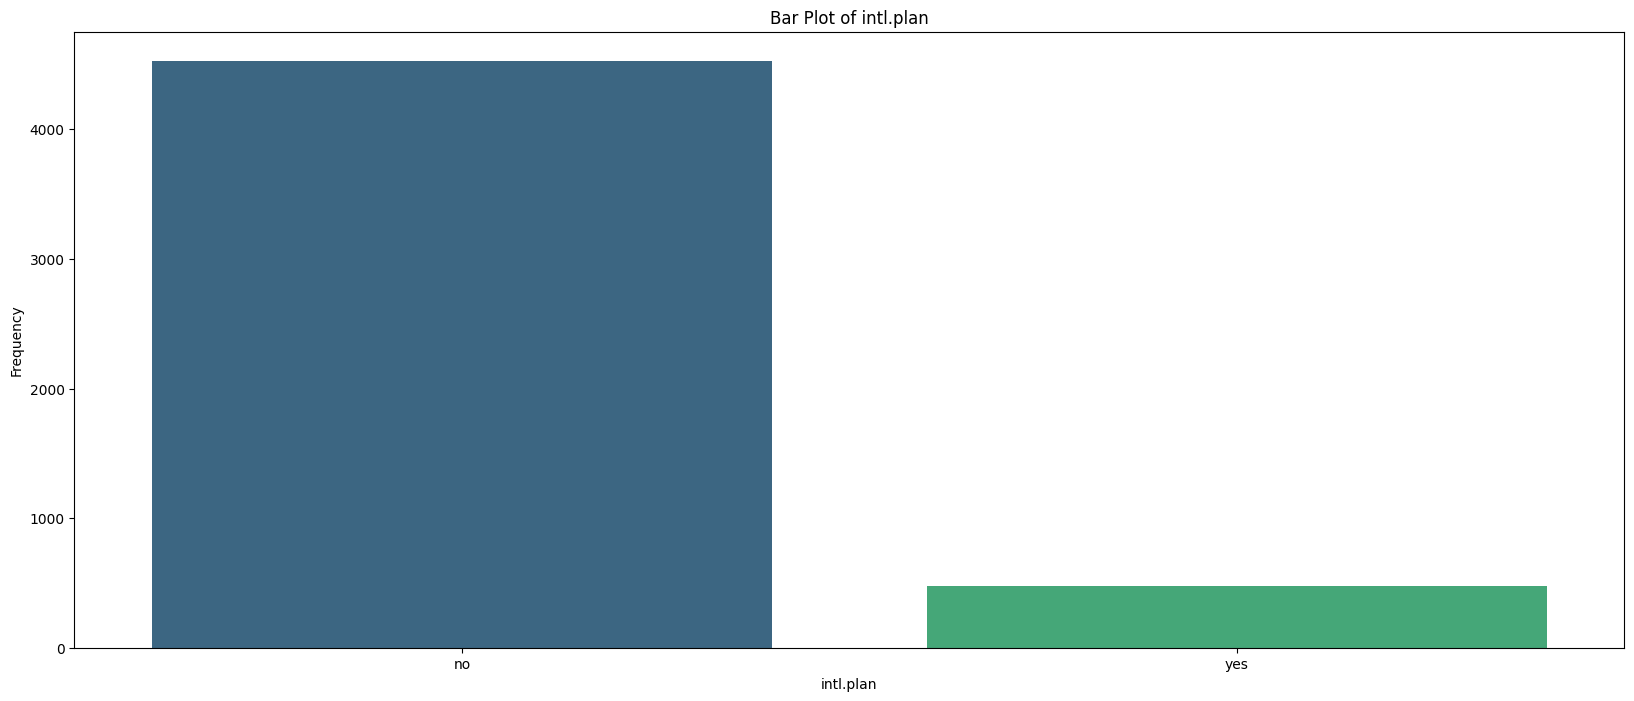

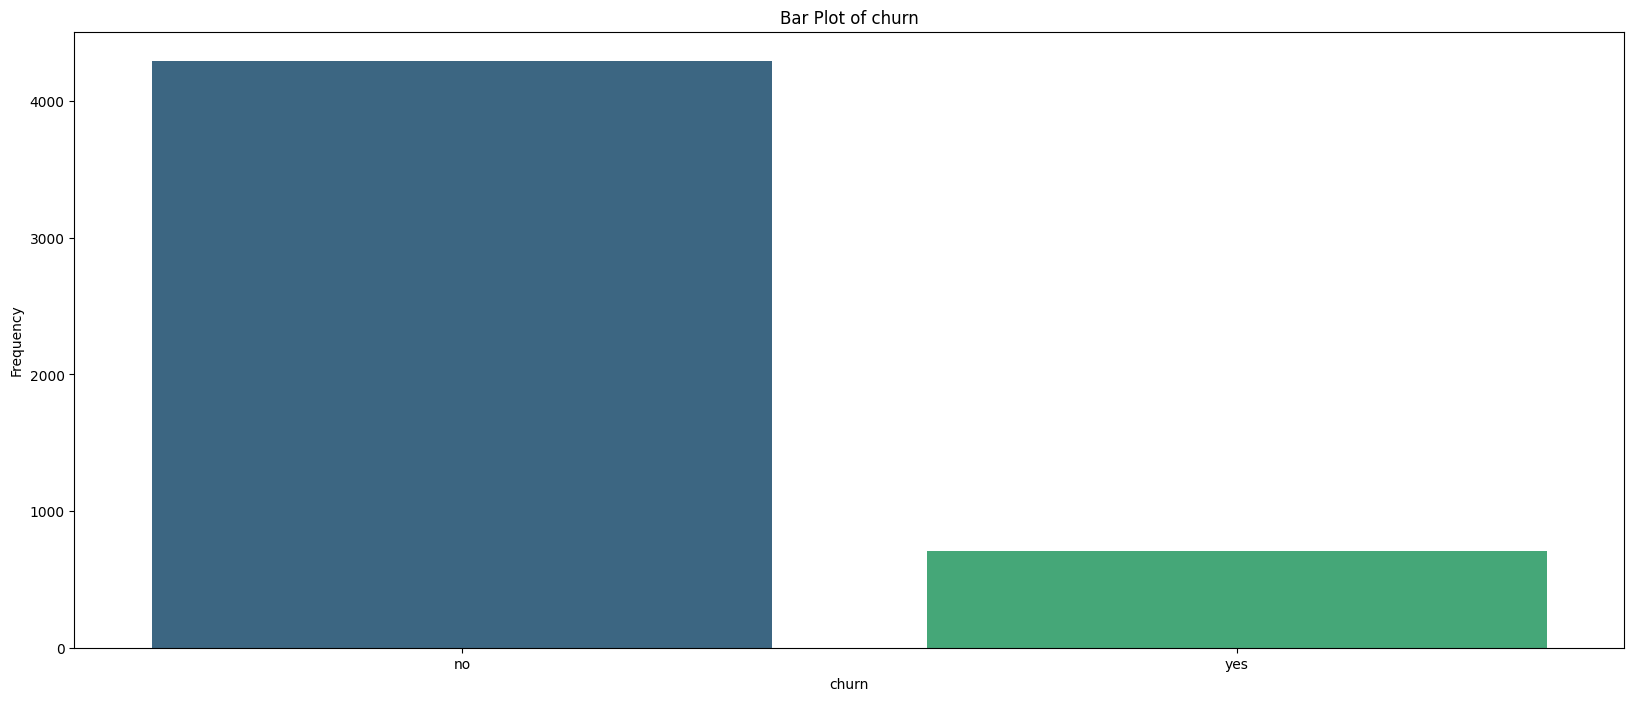

In [ ]:
### Bar Plot to check the Frequency

for column in df.select_dtypes(include=['category', 'object']).columns:
    plt.figure(figsize=(20,8))
    sns.countplot(x=df[column], palette='viridis')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Text(0.5, 0.98, 'Heat Map for the Dataset')

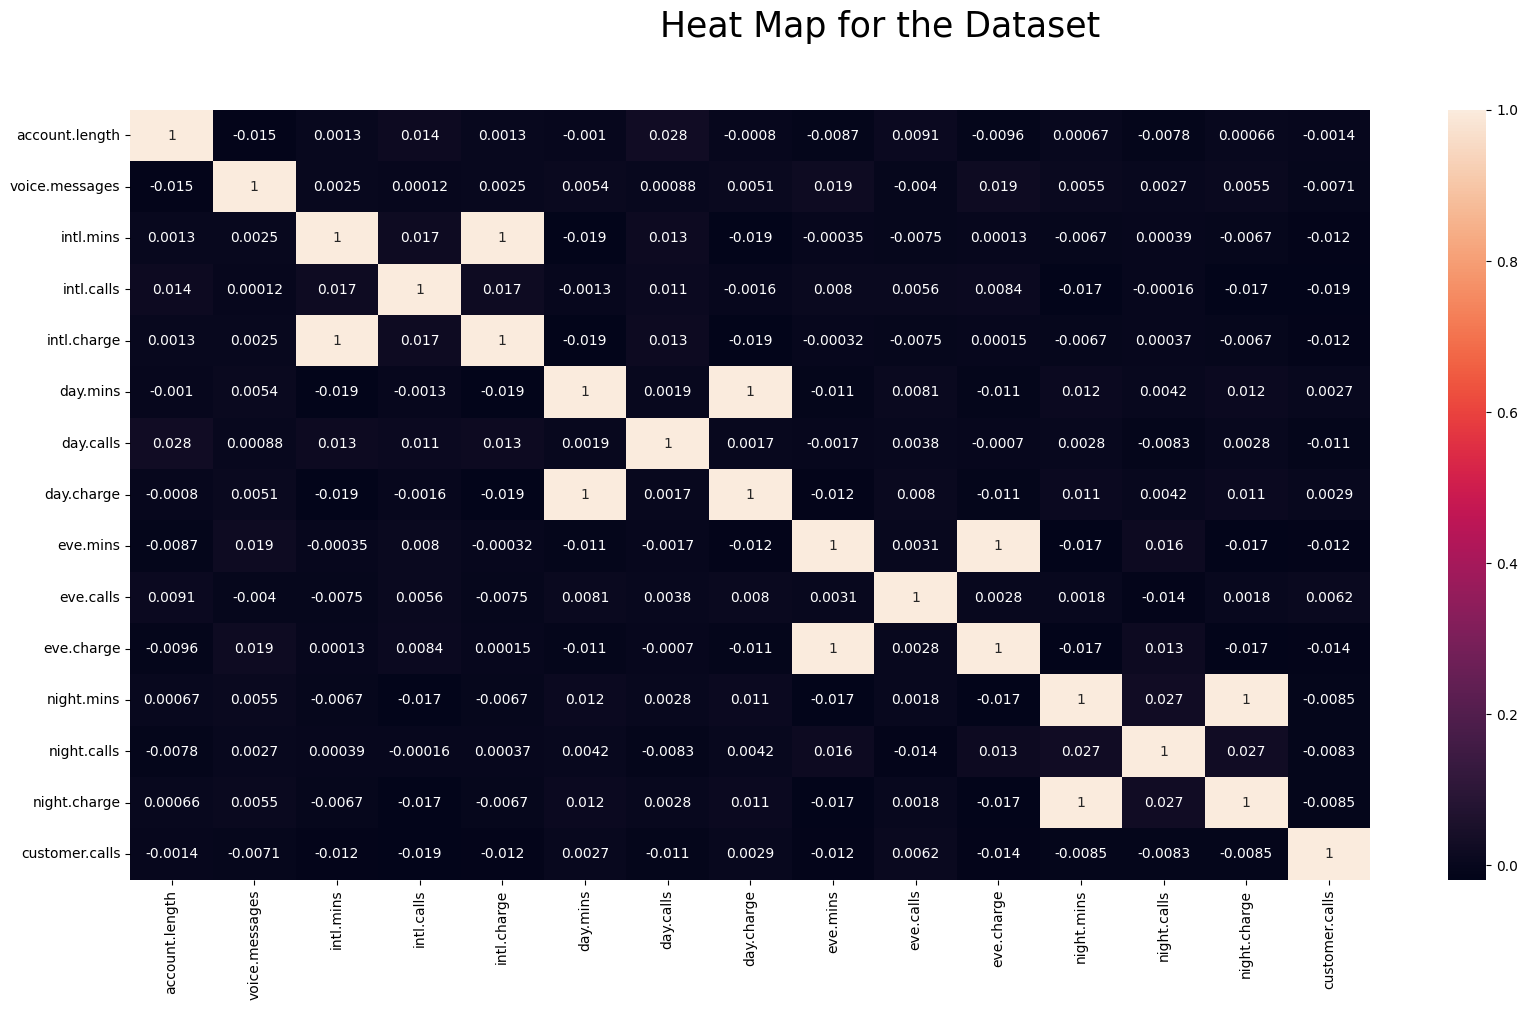

In [ ]:
num_col1=[i for i in features.columns if features[i].dtype!='O']
plt.figure(figsize=(20,10))
sns.heatmap(features[num_col1].corr(),annot=True)
plt.suptitle("Heat Map for the Dataset",size=25)

In [ ]:
features.info()        ### Checking the Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area.code       5000 non-null   object 
 1   account.length  5000 non-null   int64  
 2   voice.plan      5000 non-null   object 
 3   voice.messages  5000 non-null   int64  
 4   intl.plan       5000 non-null   object 
 5   intl.mins       5000 non-null   float64
 6   intl.calls      5000 non-null   int64  
 7   intl.charge     5000 non-null   float64
 8   day.mins        5000 non-null   float64
 9   day.calls       5000 non-null   int64  
 10  day.charge      4993 non-null   float64
 11  eve.mins        4976 non-null   float64
 12  eve.calls       5000 non-null   int64  
 13  eve.charge      5000 non-null   float64
 14  night.mins      5000 non-null   float64
 15  night.calls     5000 non-null   int64  
 16  night.charge    5000 non-null   float64
 17  customer.calls  5000 non-null   i

In [ ]:
### To get the unique values for each column
for column in features.select_dtypes(include=['int64','float64','object']).columns:
    k=features[column].nunique()
    print(f'{column}:{k}')

area.code:3
account.length:218
voice.plan:2
voice.messages:48
intl.plan:2
intl.mins:170
intl.calls:21
intl.charge:170
day.mins:1961
day.calls:123
day.charge:1961
eve.mins:1876
eve.calls:126
eve.charge:1659
night.mins:1853
night.calls:131
night.charge:1028
customer.calls:10


### Feature Engineering

In [ ]:
from sklearn.impute import SimpleImputer     ### To handle the Missing Values
from sklearn.compose import ColumnTransformer       ### To handle different data types and handling the pipline
from sklearn.pipeline import make_pipeline    ### we can use different encoding methods
from sklearn.preprocessing import OrdinalEncoder    ### we can change the categorical data to Numerical data using this

In [ ]:
features.isnull().sum()         ## To Check the Null Values

,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0
day.calls,0


In [ ]:
features.isna().any().any()     ### To check the NAN values

True

In [ ]:
features.duplicated().sum()    ### Checking the Duplicated Values
### There are no duplicated values

0

In [ ]:
### Dividing the categorical columns and numerical columns separately
cat_col=[i for i in features.columns if features[i].dtype=='O']
num_col=[i for i in features.columns if features[i].dtype!='O']

In [ ]:
### Encoding the categorical data to Numerical data
ord=make_pipeline(OrdinalEncoder())
trans=ColumnTransformer([('ord',ord,cat_col)])
df_cat=pd.DataFrame(trans.fit_transform(features[cat_col]),columns=trans.get_feature_names_out())

In [ ]:
features[num_col]

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1
1,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1
2,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0
3,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2
4,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2
4996,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3
4997,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1
4998,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0


In [ ]:
### Replacing the NAN or missing values in the dataset using median
simple=SimpleImputer(missing_values=np.nan,strategy='median')
df_num=pd.DataFrame(simple.fit_transform(features[num_col]),columns=features[num_col].columns)

In [ ]:
df_cat       ### converted categorical columns

,ord__area.code,ord__voice.plan,ord__intl.plan
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
4995,0.0,1.0,0.0
4996,1.0,0.0,0.0
4997,1.0,0.0,0.0
4998,2.0,0.0,0.0


In [ ]:
df_num

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,128.0,25.0,10.0,3.0,2.70,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,1.0
1,107.0,26.0,13.7,3.0,3.70,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,1.0
2,137.0,0.0,12.2,5.0,3.29,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,0.0
3,84.0,0.0,6.6,7.0,1.78,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,2.0
4,75.0,0.0,10.1,3.0,2.73,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50.0,40.0,9.9,5.0,2.67,235.7,127.0,40.07,223.0,126.0,18.96,297.5,116.0,13.39,2.0
4996,152.0,0.0,14.7,2.0,3.97,184.2,90.0,31.31,256.8,73.0,21.83,213.6,113.0,9.61,3.0
4997,61.0,0.0,13.6,4.0,3.67,140.6,89.0,23.90,172.8,128.0,14.69,212.4,97.0,9.56,1.0
4998,109.0,0.0,8.5,6.0,2.30,188.8,67.0,32.10,171.7,92.0,14.59,224.4,89.0,10.10,0.0


In [ ]:
df=pd.concat([df_num,df_cat],axis=1)

In [ ]:
df

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,ord__area.code,ord__voice.plan,ord__intl.plan
0,128.0,25.0,10.0,3.0,2.70,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,1.0,1.0,1.0,0.0
1,107.0,26.0,13.7,3.0,3.70,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,1.0,1.0,1.0,0.0
2,137.0,0.0,12.2,5.0,3.29,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,0.0,1.0,0.0,0.0
3,84.0,0.0,6.6,7.0,1.78,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,2.0,0.0,0.0,1.0
4,75.0,0.0,10.1,3.0,2.73,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,3.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50.0,40.0,9.9,5.0,2.67,235.7,127.0,40.07,223.0,126.0,18.96,297.5,116.0,13.39,2.0,0.0,1.0,0.0
4996,152.0,0.0,14.7,2.0,3.97,184.2,90.0,31.31,256.8,73.0,21.83,213.6,113.0,9.61,3.0,1.0,0.0,0.0
4997,61.0,0.0,13.6,4.0,3.67,140.6,89.0,23.90,172.8,128.0,14.69,212.4,97.0,9.56,1.0,1.0,0.0,0.0
4998,109.0,0.0,8.5,6.0,2.30,188.8,67.0,32.10,171.7,92.0,14.59,224.4,89.0,10.10,0.0,2.0,0.0,0.0


In [ ]:
df.duplicated().sum()  ### There are no duplicated values

0

In [ ]:
df.isnull().sum()         ### There are no missing values

,0
account.length,0
voice.messages,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0
day.calls,0
day.charge,0
eve.mins,0
eve.calls,0


In [ ]:
df.isna().any()   #### There are no NAN values

,0
account.length,False
voice.messages,False
intl.mins,False
intl.calls,False
intl.charge,False
day.mins,False
day.calls,False
day.charge,False
eve.mins,False
eve.calls,False


In [ ]:
## Removing the Outliers from the dataset
for i in range(2):
        initial_size = len(df)

        # Calculate IQR for each numerical column
        for col in df.select_dtypes(include=np.number).columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
df

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,ord__area.code,ord__voice.plan,ord__intl.plan
2,137.0,0.0,12.2,5.0,3.29,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,0.0,1.0,0.0,0.0
11,74.0,0.0,9.1,5.0,2.46,187.7,127.0,31.91,163.4,148.0,13.89,196.0,94.0,8.82,0.0,1.0,0.0,0.0
12,168.0,0.0,11.2,2.0,3.02,128.8,96.0,30.62,104.9,71.0,8.92,141.1,128.0,6.35,1.0,0.0,0.0,0.0
13,95.0,0.0,12.3,5.0,3.32,156.6,88.0,26.62,247.6,75.0,21.05,192.3,115.0,8.65,3.0,2.0,0.0,0.0
17,93.0,0.0,8.1,3.0,2.19,190.7,114.0,32.42,218.2,111.0,18.55,129.6,121.0,5.83,3.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,73.0,0.0,11.5,6.0,3.11,177.9,89.0,30.24,131.2,82.0,11.15,186.2,89.0,8.38,3.0,0.0,0.0,0.0
4994,75.0,0.0,6.9,7.0,1.86,170.7,101.0,29.02,193.1,126.0,16.41,129.1,104.0,5.81,1.0,0.0,0.0,0.0
4996,152.0,0.0,14.7,2.0,3.97,184.2,90.0,31.31,256.8,73.0,21.83,213.6,113.0,9.61,3.0,1.0,0.0,0.0
4997,61.0,0.0,13.6,4.0,3.67,140.6,89.0,23.90,172.8,128.0,14.69,212.4,97.0,9.56,1.0,1.0,0.0,0.0


In [ ]:
#def box_plot(df,columns):
   # threshold=2
    #z_score=stats.zscore(df[columns])
  #  return df[(abs(z_score)<=threshold).all(axis=1)]

In [ ]:
##box_plot(df,df.columns)

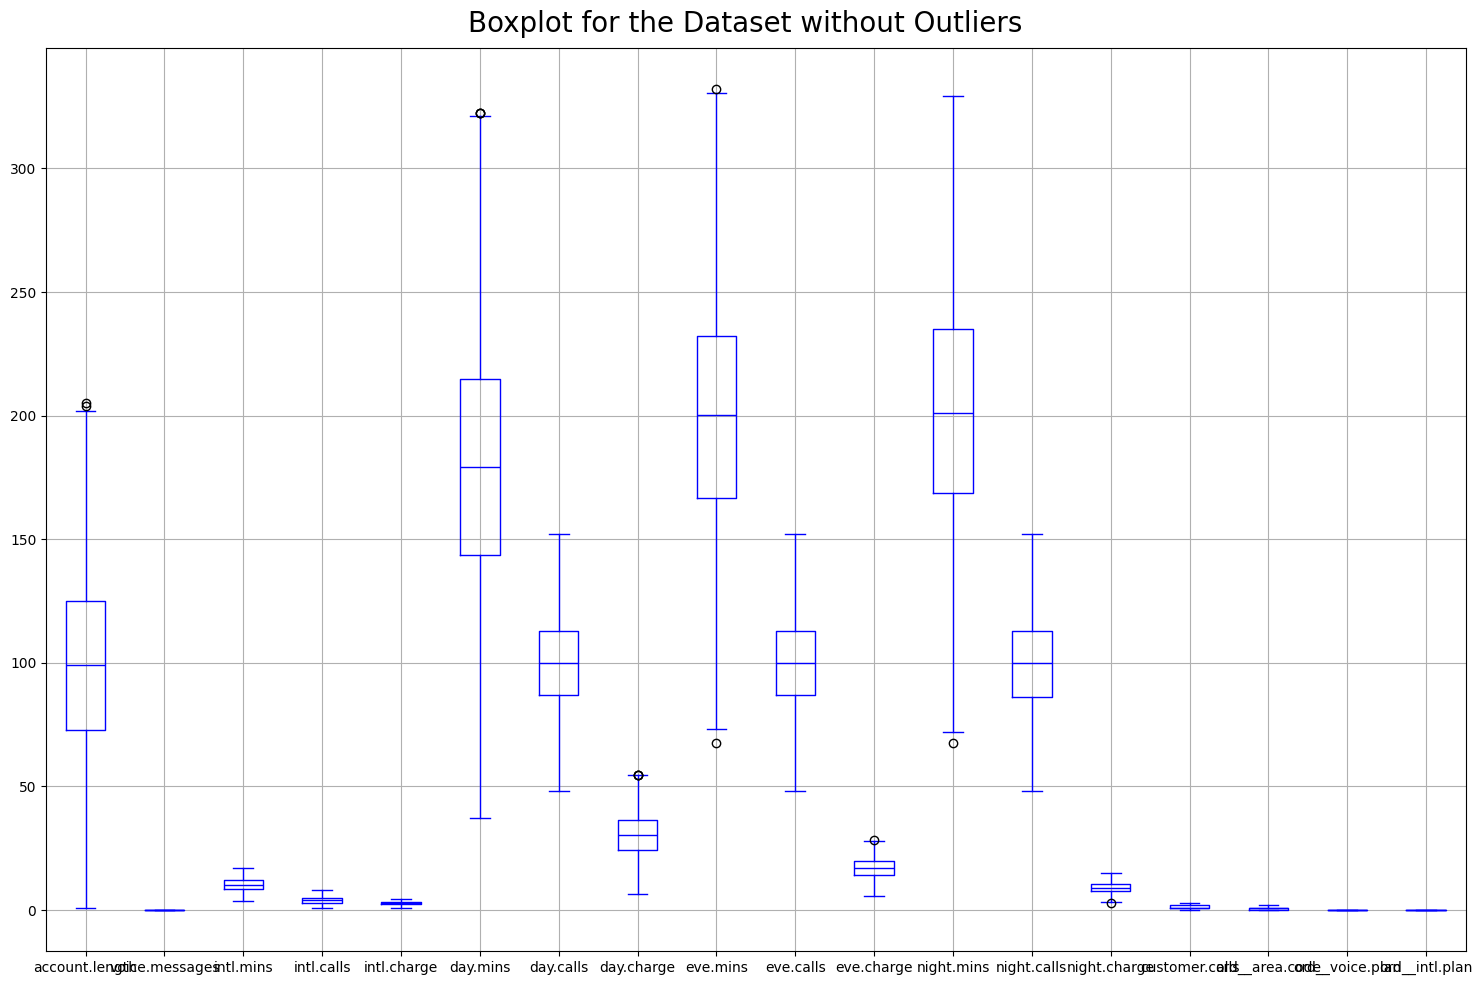

In [ ]:
df.boxplot(figsize=(15,10),color='blue')
plt.suptitle("Boxplot for the Dataset without Outliers",size=20,color='black')
plt.tight_layout()
plt.show()

In [ ]:
## Standardizing the data from original dataset
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df1=pd.DataFrame(std.fit_transform(df),columns=df.columns)     ## by Standardizing the data the mean will be zero and standard deviation will becomes to 1

In [ ]:
df

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,ord__area.code,ord__voice.plan,ord__intl.plan
2,137.0,0.0,12.2,5.0,3.29,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,0.0,1.0,0.0,0.0
11,74.0,0.0,9.1,5.0,2.46,187.7,127.0,31.91,163.4,148.0,13.89,196.0,94.0,8.82,0.0,1.0,0.0,0.0
12,168.0,0.0,11.2,2.0,3.02,128.8,96.0,30.62,104.9,71.0,8.92,141.1,128.0,6.35,1.0,0.0,0.0,0.0
13,95.0,0.0,12.3,5.0,3.32,156.6,88.0,26.62,247.6,75.0,21.05,192.3,115.0,8.65,3.0,2.0,0.0,0.0
17,93.0,0.0,8.1,3.0,2.19,190.7,114.0,32.42,218.2,111.0,18.55,129.6,121.0,5.83,3.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,73.0,0.0,11.5,6.0,3.11,177.9,89.0,30.24,131.2,82.0,11.15,186.2,89.0,8.38,3.0,0.0,0.0,0.0
4994,75.0,0.0,6.9,7.0,1.86,170.7,101.0,29.02,193.1,126.0,16.41,129.1,104.0,5.81,1.0,0.0,0.0,0.0
4996,152.0,0.0,14.7,2.0,3.97,184.2,90.0,31.31,256.8,73.0,21.83,213.6,113.0,9.61,3.0,1.0,0.0,0.0
4997,61.0,0.0,13.6,4.0,3.67,140.6,89.0,23.90,172.8,128.0,14.69,212.4,97.0,9.56,1.0,1.0,0.0,0.0


In [ ]:
### Merging the dataset of features and target
df_data=pd.merge(df1,target,left_index=True,right_index=True)

In [ ]:
df_data

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,ord__area.code,ord__voice.plan,ord__intl.plan,churn
0,0.969809,0.0,0.747391,0.537221,0.740938,1.226174,0.741493,1.226104,-1.618567,0.507922,-1.616715,-0.789161,0.226653,-0.787808,-1.350649,0.007971,0.0,0.0,no
1,-0.645949,0.0,-0.468755,0.537221,-0.465179,0.157799,1.427583,0.157112,-0.747886,2.484212,-0.747416,-0.101390,-0.290692,-0.101426,-1.350649,0.007971,0.0,0.0,no
2,1.764864,0.0,0.355086,-1.154802,0.348587,-0.971955,-0.208479,0.011494,-1.954873,-1.520375,-1.950875,-1.231888,1.468281,-1.231668,-0.338711,-1.401778,0.0,0.0,no
3,-0.107363,0.0,0.786622,0.537221,0.784533,-0.438727,-0.630688,-0.440034,0.989351,-1.312345,0.986339,-0.177580,0.795732,-0.179216,1.685165,1.417720,0.0,0.0,no
4,-0.158657,0.0,-0.861061,-0.590795,-0.857530,0.215341,0.741493,0.214682,0.382762,0.559930,0.380977,-1.468695,1.106139,-1.469613,1.685165,1.417720,0.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-0.671596,0.0,0.472778,1.101229,0.479371,-0.030174,-0.577912,-0.031401,-1.412244,-0.948291,-1.410892,-0.303191,-0.549364,-0.302765,1.685165,-1.401778,0.0,0.0,no
2649,-0.620302,0.0,-1.331827,1.665237,-1.337071,-0.168276,0.055402,-0.169117,-0.135107,1.340044,-0.137212,-1.478991,0.226653,-1.478765,-0.338711,-1.401778,0.0,0.0,no
2650,1.354513,0.0,1.728155,-1.154802,1.729083,0.090666,-0.525136,0.089383,1.179167,-1.416360,1.175212,0.261029,0.692263,0.260068,1.685165,0.007971,0.0,0.0,no
2651,-0.979360,0.0,1.296619,-0.026787,1.293137,-0.745621,-0.577912,-0.747072,-0.553942,1.444060,-0.553701,0.236318,-0.135489,0.237188,-0.338711,0.007971,0.0,0.0,no


### Building the Model

In [ ]:
## Dividing the dataset into features and target for predicting the results
features=df_data.drop(columns='churn')
target=df_data['churn']

In [ ]:
## the features columns
features

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,ord__area.code,ord__voice.plan,ord__intl.plan
0,0.969809,0.0,0.747391,0.537221,0.740938,1.226174,0.741493,1.226104,-1.618567,0.507922,-1.616715,-0.789161,0.226653,-0.787808,-1.350649,0.007971,0.0,0.0
1,-0.645949,0.0,-0.468755,0.537221,-0.465179,0.157799,1.427583,0.157112,-0.747886,2.484212,-0.747416,-0.101390,-0.290692,-0.101426,-1.350649,0.007971,0.0,0.0
2,1.764864,0.0,0.355086,-1.154802,0.348587,-0.971955,-0.208479,0.011494,-1.954873,-1.520375,-1.950875,-1.231888,1.468281,-1.231668,-0.338711,-1.401778,0.0,0.0
3,-0.107363,0.0,0.786622,0.537221,0.784533,-0.438727,-0.630688,-0.440034,0.989351,-1.312345,0.986339,-0.177580,0.795732,-0.179216,1.685165,1.417720,0.0,0.0
4,-0.158657,0.0,-0.861061,-0.590795,-0.857530,0.215341,0.741493,0.214682,0.382762,0.559930,0.380977,-1.468695,1.106139,-1.469613,1.685165,1.417720,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-0.671596,0.0,0.472778,1.101229,0.479371,-0.030174,-0.577912,-0.031401,-1.412244,-0.948291,-1.410892,-0.303191,-0.549364,-0.302765,1.685165,-1.401778,0.0,0.0
2649,-0.620302,0.0,-1.331827,1.665237,-1.337071,-0.168276,0.055402,-0.169117,-0.135107,1.340044,-0.137212,-1.478991,0.226653,-1.478765,-0.338711,-1.401778,0.0,0.0
2650,1.354513,0.0,1.728155,-1.154802,1.729083,0.090666,-0.525136,0.089383,1.179167,-1.416360,1.175212,0.261029,0.692263,0.260068,1.685165,0.007971,0.0,0.0
2651,-0.979360,0.0,1.296619,-0.026787,1.293137,-0.745621,-0.577912,-0.747072,-0.553942,1.444060,-0.553701,0.236318,-0.135489,0.237188,-0.338711,0.007971,0.0,0.0


In [ ]:
### target column
target

,churn
0,no
1,no
2,no
3,no
4,no
...,...
2648,no
2649,no
2650,no
2651,no


In [ ]:
from sklearn.model_selection import train_test_split    ### used for splitting the data to train and test

In [ ]:
## Splitting the data into x_train,x_testmy_train,y_test
## taking the training dataset as 75% and test size as 25%
### random_state refers to shuffling the dataset
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [ ]:
### checking the sizes of the x_train,x_test,y_train,y_test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1989, 18)
(1989,)
(664, 18)
(664,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
models={'Logistic Regression':LogisticRegression(),
       "Bagging Classifier":BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=100,max_features=1.0,max_samples=0.9),
       'Random Forest Classifier':RandomForestClassifier(),
       'Support Vector Classifier':SVC(),
       'KNeighbors Classifier':KNeighborsClassifier(),
       'Decision Tree Classifier':DecisionTreeClassifier()}      ### Taking the algorithms into one dictionary form

In [ ]:
results={}
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    results[model_name]=accuracy
    accuracy1=(accuracy)*100

In [ ]:
for model_name,accuracy in results.items():
    print(f'{model_name}:{accuracy}')

Logistic Regression:0.8674698795180723
Bagging Classifier:0.8674698795180723
Random Forest Classifier:0.8674698795180723
Support Vector Classifier:0.8674698795180723
KNeighbors Classifier:0.8373493975903614
Decision Tree Classifier:0.7560240963855421


### Hyper Parameter Tuning

In [ ]:
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Bagging Classifier': {'n_estimators': [50, 100]},
    'Random Forest Classifier': {'n_estimators': [50, 100], 'max_depth': [3, 5, 10]},
    'Support Vector Classifier': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNeighbors Classifier': {'n_neighbors': [3, 5, 7]},
    'Decision Tree Classifier': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 4]}
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_results = {}
for model_name, pipeline in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    grid_results[model_name] = grid_search.best_score_

# Print best results
for model_name, score in grid_results.items():
    print(f'{model_name} Best Score: {score:.4f}')

Running GridSearchCV for Logistic Regression...
Running GridSearchCV for Bagging Classifier...
Running GridSearchCV for Random Forest Classifier...
Running GridSearchCV for Support Vector Classifier...
Running GridSearchCV for KNeighbors Classifier...
Running GridSearchCV for Decision Tree Classifier...
Logistic Regression Best Score: 0.8577
Bagging Classifier Best Score: 0.8572
Random Forest Classifier Best Score: 0.8577
Support Vector Classifier Best Score: 0.8577
KNeighbors Classifier Best Score: 0.8517
Decision Tree Classifier Best Score: 0.8577


### Model Evaluation

In [ ]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=model1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.8674698795180723

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

          no       0.87      1.00      0.93       576
         yes       0.00      0.00      0.00        88

    accuracy                           0.87       664
   macro avg       0.43      0.50      0.46       664
weighted avg       0.75      0.87      0.81       664



In [ ]:
### Deployment

In [ ]:
import pickle

In [ ]:
file = 'model.pkl'
pickle.dump(model1,open(file,'wb'))

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
%%writefile Model_Dep_Telecommunication.py
import streamlit as st
import pickle
import pandas as pd
model1=pickle.load(open('model.pkl','rb'))
st.title("Model Deployment for TeleCommunication Dataset")
def user_input_parameters():
  account_length=st.number_input("Account Length")
  voice_messages=st.number_input("voice messages")
  day_minutes=st.number_input("Total day minutes")
  day_calls=st.number_input("Total day calls")
  day_charge=st.number_input("Total day charge")
  eve_minutes=st.number_input("Total eve minutes")
  eve_calls=st.number_input("Total eve calls")
  eve_charge=st.number_input("Total eve charge")
  night_minutes=st.number_input("Total night minutes")
  night_calls=st.number_input("Total night calls")
  night_charge=st.number_input("Total night charge")
  intl_minutes=st.number_input("Total intl minutes")
  intl_calls=st.number_input("Total intl calls")
  intl_charge=st.number_input("Total intl charge")
  customer_calls=st.number_input("Customer service calls")

  ord__area_code=st.selectbox("Area Codes 0-area_code_408 1-area_code_415 2-area_code_512",[0,1,2])
  ord__voice_plan=st.selectbox("Voice plan 1-yes 0-No",[0,1])
  ord__intl_plan=st.selectbox("Order int plan No-0,Yes-1",[0,1])
  data={"account.length":account_length,'voice.messages':voice_messages,'intl.mins':intl_minutes,'intl.calls':intl_calls,'intl.charge':intl_charge,'day.mins':day_minutes,'day.calls':day_calls,'day.charge':day_charge,
        'eve.mins':eve_minutes,'eve.calls':eve_calls,'eve.charge':eve_charge,'night.mins':night_minutes,'night.calls':night_calls,'night.charge':night_charge,
        'customer.calls':customer_calls,
        'ord__area.code':ord__area_code,'ord__voice.plan':ord__voice_plan,'ord__intl.plan':ord__intl_plan}
  features=pd.DataFrame(data,index=[0])
  return features
df=user_input_parameters()
st.subheader('User Inputs')
st.write(df)
predict=model1.predict(df)
predict_proba=model1.predict_proba(df)
st.subheader(df)
st.write('yes The Customer is Discontinued' if predict_proba[0][1]>0.5 else 'No The Customer is Active')
st.subheader('predict_prob')
st.write(predict_proba)


Writing Model_Dep_Telecommunication.py


In [ ]:
!npm install -g localtunnel -U


added 22 packages, and audited 23 packages in 3s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.224.81.225


In [ ]:
!streamlit run Model_Dep_Telecommunication.py & npx localtunnel --port 8501



your url is: https://cool-wolves-dance.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.224.81.225:8501

